# Exercizes on clustering

Here you can find a program to read a data file in csv format. 
The data file has the following heading:
    number of samples, number of features
    list of the names of the features (separated by comma)
The remaining lines contain an example per row.
For each row there is a list of real numbers (commas separated) which are the feature values.   

In [9]:
import csv
import sys
from os.path import join

import numpy as np
 
# this function reads the data file, loads the configuration attributes specifiefd in the heading
# (numer of examples and features), the list of feature names
# and loads the data in a matrix named data    
def load_data(file_path, file_name):
    with open(join(file_path, file_name)) as csv_file:
        data_file = csv.reader(csv_file,delimiter=',')
        temp1 = next(data_file)
        n_samples = int(temp1[0])
        print("n_samples=")
        print(n_samples)
        n_features = int(temp1[1])
        temp2 = next(data_file)
        feature_names = np.array(temp2[:n_features])

        data_list = [iter for iter in data_file]
               
        data = np.asarray(data_list, dtype=np.float64)                  
       
    return(data,feature_names,n_samples,n_features)

# The main program reads the input file containing the dataset
# file_path is the file path where the file with the data to be read are located
# we assume the file contains an example per line
# each example is a list of real values separated by a comma (csv format)
# The first line of the file contains the heading with:
# N_samples,n_features,
# The second line contains the feature names separated by a comma     

#file_path="~/meo/Documents/Didattica/Laboratorio-15-16-Jupyter/"
file_path="./Datasets"
# all the three datasets contain data points on (x,y) 
file_name1="3-clusters.csv"
file_name2="dataset-DBSCAN.csv"     
file_name3="CURE-complete.csv"    
data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name1)
data2,feature_names2,n_samples2,n_features2 = load_data(file_path, file_name2)
data3,feature_names3,n_samples3,n_features3 = load_data(file_path, file_name3)
print("dataset n. 1: n samples, n features")
print(n_samples1, n_features1)
print("dataset n. 2: n samples, n features")
print(n_samples2, n_features2)
print("dataset n. 3: n samples, n features")
print(n_samples3, n_features3)

n_samples=
150
n_samples=
6118
n_samples=
86558
dataset n. 1: n samples, n features
150 2
dataset n. 2: n samples, n features
6118 2
dataset n. 3: n samples, n features
86558 2


The following program plots the dataset n.1

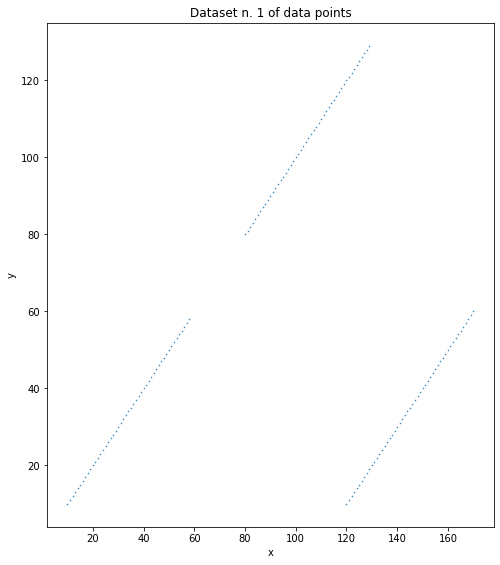

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 1 of data points')

ax.set_xlabel(feature_names1[0])
ax.set_ylabel(feature_names1[1])

#plot the dataset
plt.plot(data1[:,0], data1[:,1], '.',markersize=1)

plt.show()

The following is the program for plotting the dataset n.2

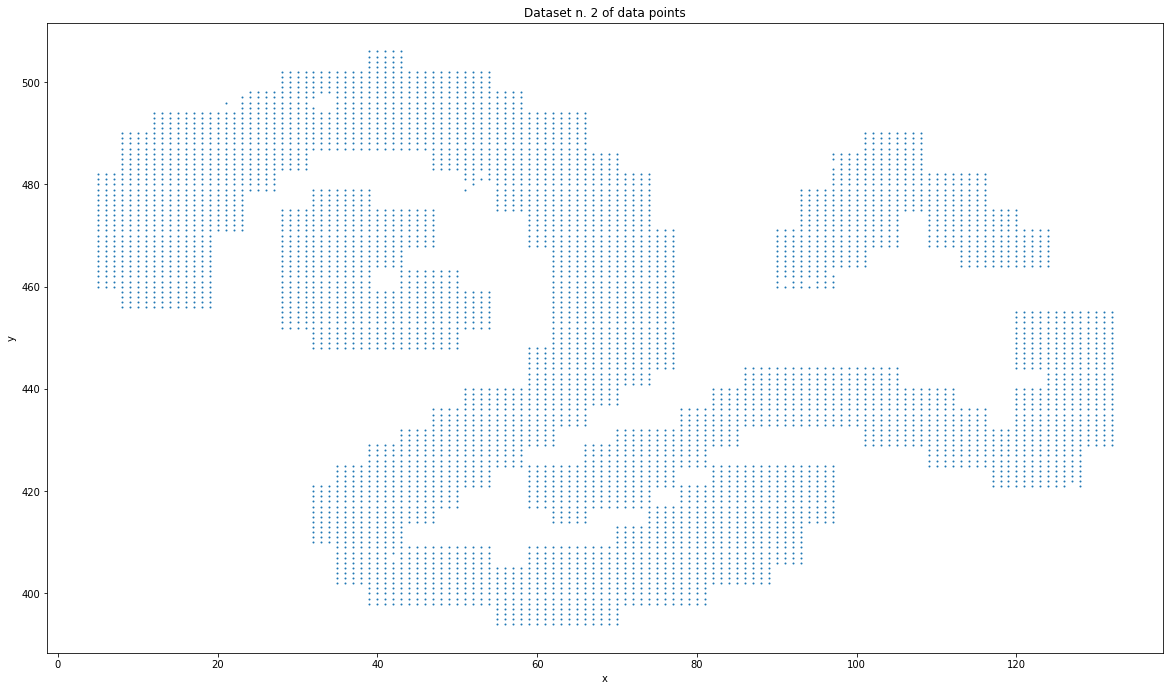

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 2 of data points')

ax.set_xlabel(feature_names2[0])
ax.set_ylabel(feature_names2[1])

#plot the dataset
plt.plot(data2[:,0], data2[:,1], '.', markersize=2)

plt.show()

The following is the program for plotting the dataset n.3

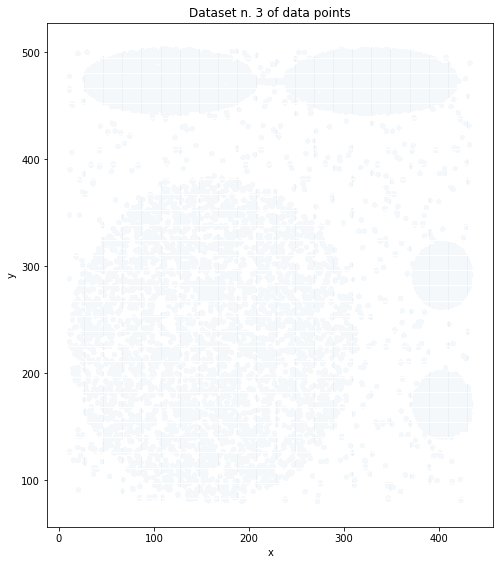

In [12]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Dataset n. 3 of data points')

ax.set_xlabel(feature_names3[0])
ax.set_ylabel(feature_names3[1])

#plot the dataset
plt.plot(data3[:,0], data3[:,1], '.', markersize=0.5, markeredgecolor = 'none')

plt.show()

## In the following program we cluster the dataset n.1 with K-means. 
From the plot of dataset n.1 we see 3 separated clusters. Thus k=3. 

In [23]:
import csv
import sys
from os.path import join

import numpy as np
 
def load_data(file_path, file_name):
    with open(join(file_path, file_name)) as csv_file:
        data_file = csv.reader(csv_file,delimiter=',')
        temp1 = next(data_file)
        n_samples = int(temp1[0])
        n_features = int(temp1[1])
        temp2 = next(data_file)
        feature_names = np.array(temp2[:n_features])

        data_list = [iter for iter in data_file]
               
        data = np.asarray(data_list, dtype=np.float64)                  
       
    return(data,feature_names,n_samples,n_features)

# The main program reads the input file containing the dataset
# file_path is the file path where the file with the data to be read are located
# we assume the file contains an example per line
# each example is a list of real values separated by a comma (csv format)
# The first line of the file contains the heading with:
# N_samples,n_features,
# The second line contains the feature names separated by a comma     

#file_path="~/meo/Documents/Didattica/Laboratorio-15-16-Jupyter/"
file_path="./Datasets"
# all the three datasets contain data points on (x,y) 
file_name1="3-clusters.csv"

data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name1)

from sklearn.cluster import KMeans

np.random.seed(5)

k=3
kmeans1 = KMeans(n_clusters=k, random_state=0).fit(data1)

#i=0
#for i in range(n_samples1):
    #print("Example n."+str(i)+"=("+str(data1[i,0])+","+str(data1[i,1])+")")
    #print("in cluster n."+str(kmeans1.labels_[i]))

In the following program we plot the clusters

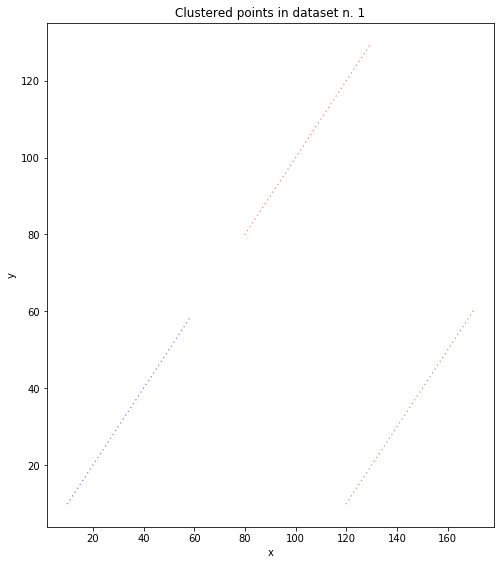

In [24]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Clustered points in dataset n. 1')

ax.set_xlabel('x')
ax.set_ylabel('y')

# set the list of colors to be selected when plotting the different clusters
color=['b','g','r','c','m','y','k','mediumspringgreen','lightsteelblue','crimson']
    
#plot the dataset
for clu in range(k):
    # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
    data_list_x = [data1[i,0] for i in range(n_samples1) if kmeans1.labels_[i]==clu]
    data_list_y = [data1[i,1] for i in range(n_samples1) if kmeans1.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu], alpha=0.5)

plt.show()

In the following cell we perform clustering with K-means on dataset2

In [25]:
k=3
kmeans2 = KMeans(n_clusters=k, random_state=0).fit(data2)
#i=0
#for i in range(n_samples2):
    #print("Example n."+str(i)+ "= ("+str(data2[i,0])+","+str(data2[i,1])+")")
    #print("in cluster n."+str(kmeans2.labels_[i]))

In the following we plot clustering results on dataset2

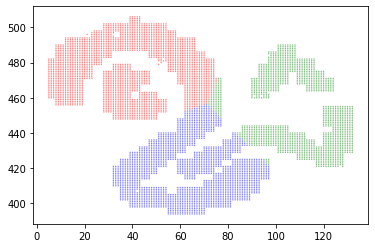

In [26]:
for clu in range(k):
    data_list_x = [data2[i,0] for i in range(n_samples2) if kmeans2.labels_[i]==clu]
    data_list_y = [data2[i,1] for i in range(n_samples2) if kmeans2.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu], alpha=0.5)

plt.show()

We perform clustering with K-means on the remaining dataset3

In [27]:
k=3
kmeans3 = KMeans(n_clusters=k, random_state=0).fit(data3)
#i=0
#for i in range(n_samples3):
    #print("Example n."+str(i)+ "= ("+str(data3[i,0])+","+str(data3[i,1])+")")
    #print("in cluster n."+str(kmeans3.labels_[i]))

In the following we plot clustering results on dataset3

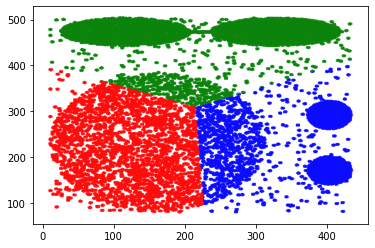

In [28]:
for clu in range(k):
    data_list_x = [data3[i,0] for i in range(n_samples3) if kmeans3.labels_[i]==clu]
    data_list_y = [data3[i,1] for i in range(n_samples3) if kmeans3.labels_[i]==clu]
    plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu], alpha=0.5)
plt.show()

In the following cells I propose you to write a program that computes with a statistical measure of your choice a quantitative evaluation of clusters in the three datasets.
It is advisable to execute K-means a certain number of times (let us try 10 times) and then select the clustering solution that gives the best value of the evaluation measure.

Misure dataset numero 1



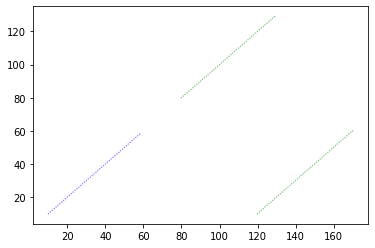

SSE per K =  2  e'  225889.1089108911
Silhouette per K =  2  e'  0.5651096232579514


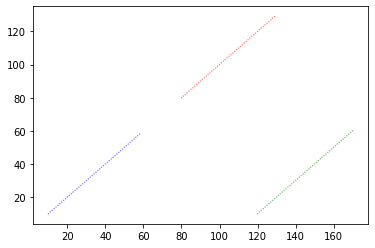

SSE per K =  3  e'  62525.0
Silhouette per K =  3  e'  0.7229402453727759


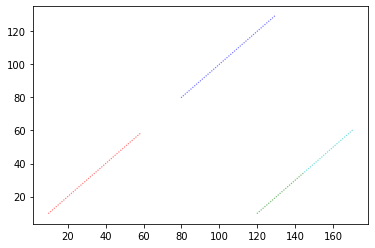

SSE per K =  4  e'  45950.0
Silhouette per K =  4  e'  0.6824925173029859


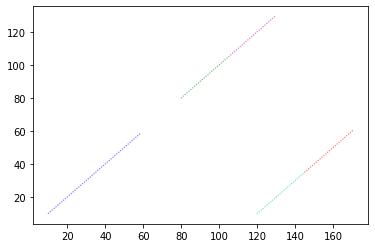

SSE per K =  5  e'  30325.0
Silhouette per K =  5  e'  0.6372722940289592


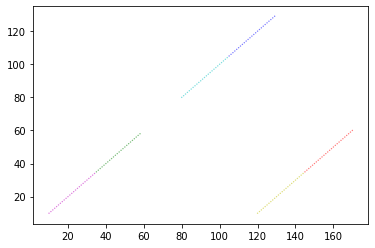

SSE per K =  6  e'  15625.0
Silhouette per K =  6  e'  0.6113126050223654


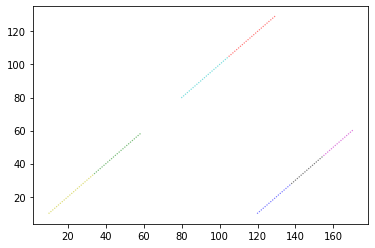

SSE per K =  7  e'  12565.0
Silhouette per K =  7  e'  0.595587703417737


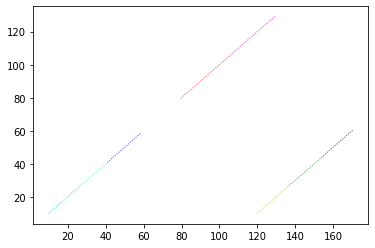

SSE per K =  8  e'  9857.0
Silhouette per K =  8  e'  0.5796286284346166


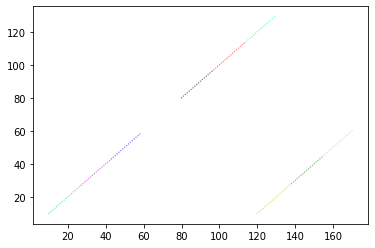

SSE per K =  9  e'  6953.0
Silhouette per K =  9  e'  0.5655359282754999


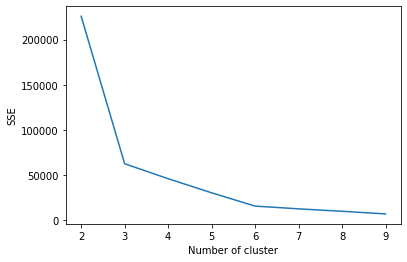

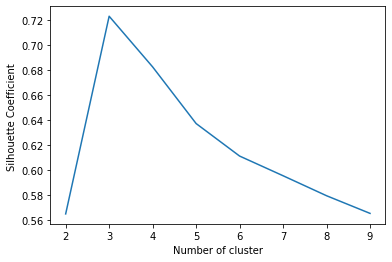

Misure dataset numero 2



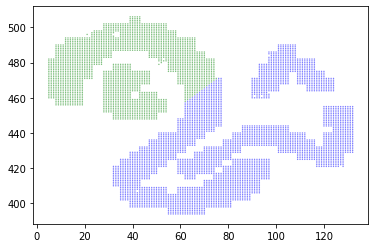

SSE per K =  2  e'  6012536.807920577
Silhouette per K =  2  e'  0.43322366812579544


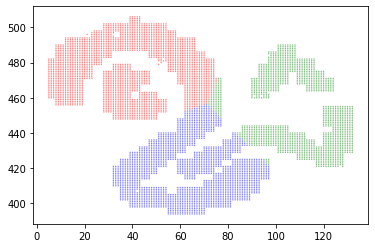

SSE per K =  3  e'  3327510.4192998204
Silhouette per K =  3  e'  0.47978199225806895


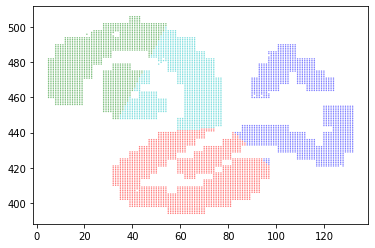

SSE per K =  4  e'  2586274.2750921035
Silhouette per K =  4  e'  0.41675746111320705


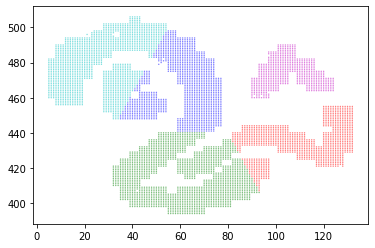

SSE per K =  5  e'  2055622.2700786723
Silhouette per K =  5  e'  0.42533681414055413


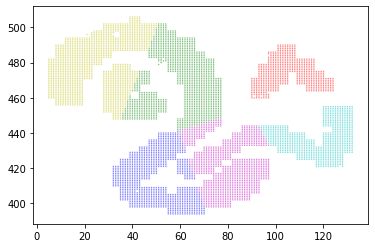

SSE per K =  6  e'  1660203.6138094265
Silhouette per K =  6  e'  0.4118606885247269


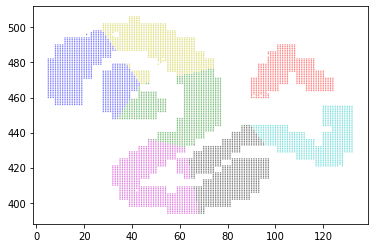

SSE per K =  7  e'  1290897.8320973702
Silhouette per K =  7  e'  0.43401438030592887


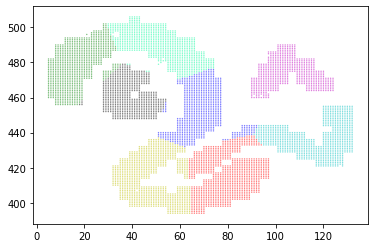

SSE per K =  8  e'  1108669.9247965966
Silhouette per K =  8  e'  0.44525029179510084


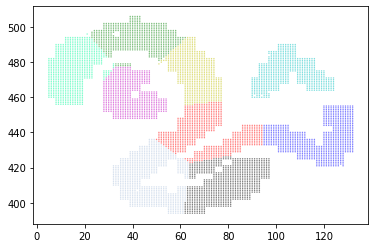

SSE per K =  9  e'  943422.581136082
Silhouette per K =  9  e'  0.4474975414697874


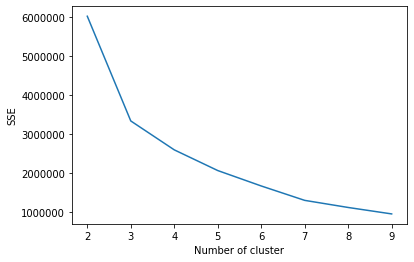

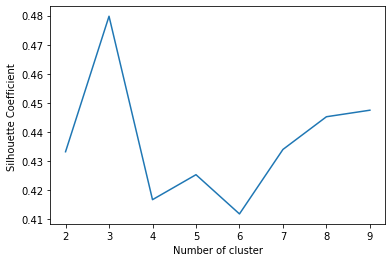

Misure dataset numero 3



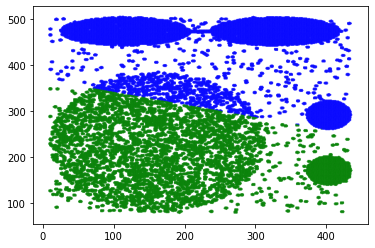

SSE per K =  2  e'  1425193092.1648767
Silhouette per K =  2  e'  0.3826902369983198


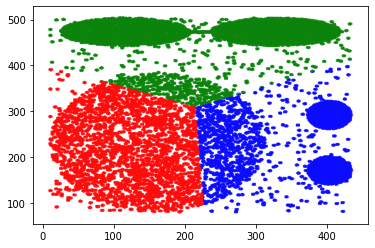

SSE per K =  3  e'  916136366.5698986
Silhouette per K =  3  e'  0.3908925034722019


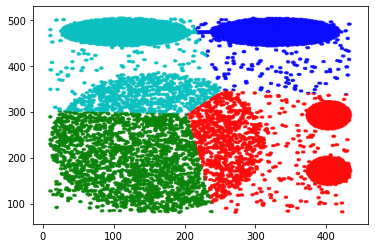

SSE per K =  4  e'  632496643.0022836
Silhouette per K =  4  e'  0.4087164366304705


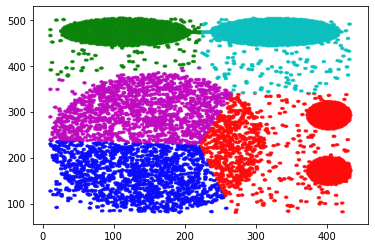

SSE per K =  5  e'  490037968.69575286
Silhouette per K =  5  e'  0.4132588687405867


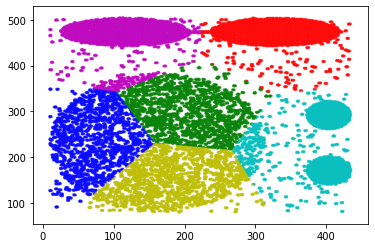

SSE per K =  6  e'  384200808.35866094
Silhouette per K =  6  e'  0.4282139055734945


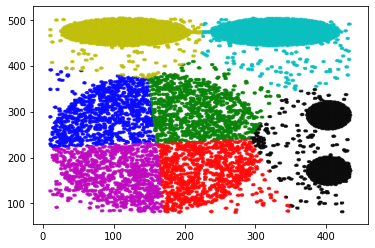

SSE per K =  7  e'  314130421.5649502
Silhouette per K =  7  e'  0.42598503072289595


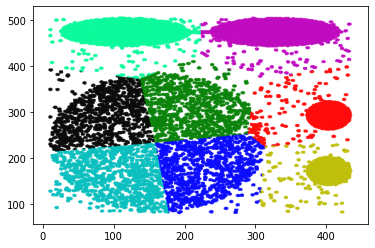

SSE per K =  8  e'  275224051.92630184
Silhouette per K =  8  e'  0.4272713559723204


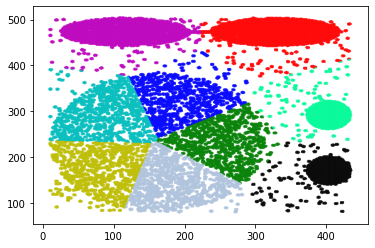

SSE per K =  9  e'  240298443.66259643
Silhouette per K =  9  e'  0.42120722086809026


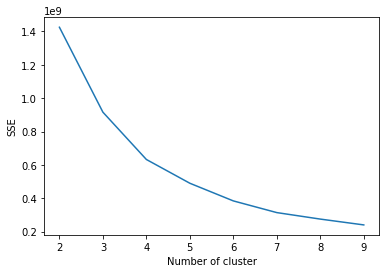

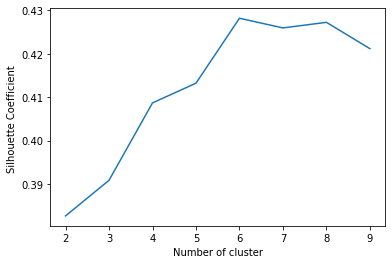

In [29]:
from sklearn.metrics import silhouette_score
def K_means(k, data, n_samples):
    np.random.seed(5)
    kmeans1 = KMeans(n_clusters=k, random_state=0).fit(data)
    label = kmeans1.labels_
    sil_coeff = silhouette_score(data, label, metric='euclidean')
    i = 0
    color=['b','g','r','c','m','y','k','mediumspringgreen','lightsteelblue','crimson']

    # plot the dataset
    for clu in range(k):
        # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
        data_list_x = [data[i, 0] for i in range(n_samples) if kmeans1.labels_[i] == clu]
        data_list_y = [data[i, 1] for i in range(n_samples) if kmeans1.labels_[i] == clu]
        plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu], alpha=0.5)
    plt.show()
    return kmeans1.inertia_, sil_coeff #Sum of distances of samples to their closest cluster cente

SSE = {}
sil_coeff = {}
print("Misure dataset numero 1\n")
for i in range(2,10):
    SSE[i], sil_coeff[i] = K_means(i, data1, n_samples1)
    print("SSE per K = ",i," e' ",SSE[i])
    print("Silhouette per K = ",i," e' ",sil_coeff[i])
plt.plot(list(SSE.keys()), list(SSE.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()
plt.plot(list(sil_coeff.keys()), list(sil_coeff.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient ")
plt.show()
print("Misure dataset numero 2\n")
for i in range(2,10):
    SSE[i], sil_coeff[i]= K_means(i, data2, n_samples2)
    print("SSE per K = ",i," e' ",SSE[i])
    print("Silhouette per K = ",i," e' ",sil_coeff[i])
plt.plot(list(SSE.keys()), list(SSE.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()
plt.plot(list(sil_coeff.keys()), list(sil_coeff.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient ")
plt.show()

print("Misure dataset numero 3\n")
for i in range(2,10):
    SSE[i], sil_coeff[i] = K_means(i, data3, n_samples3)
    print("SSE per K = ",i," e' ",SSE[i])
    print("Silhouette per K = ",i," e' ",sil_coeff[i])
plt.plot(list(SSE.keys()), list(SSE.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()
plt.plot(list(sil_coeff.keys()), list(sil_coeff.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Coefficient ")
plt.show()

As already done with classification by k-nn, plot in the cell below the quantitative measure of your choice (used above) with an increasing value of k (the number of clusters) so that the best value of k can be selected.

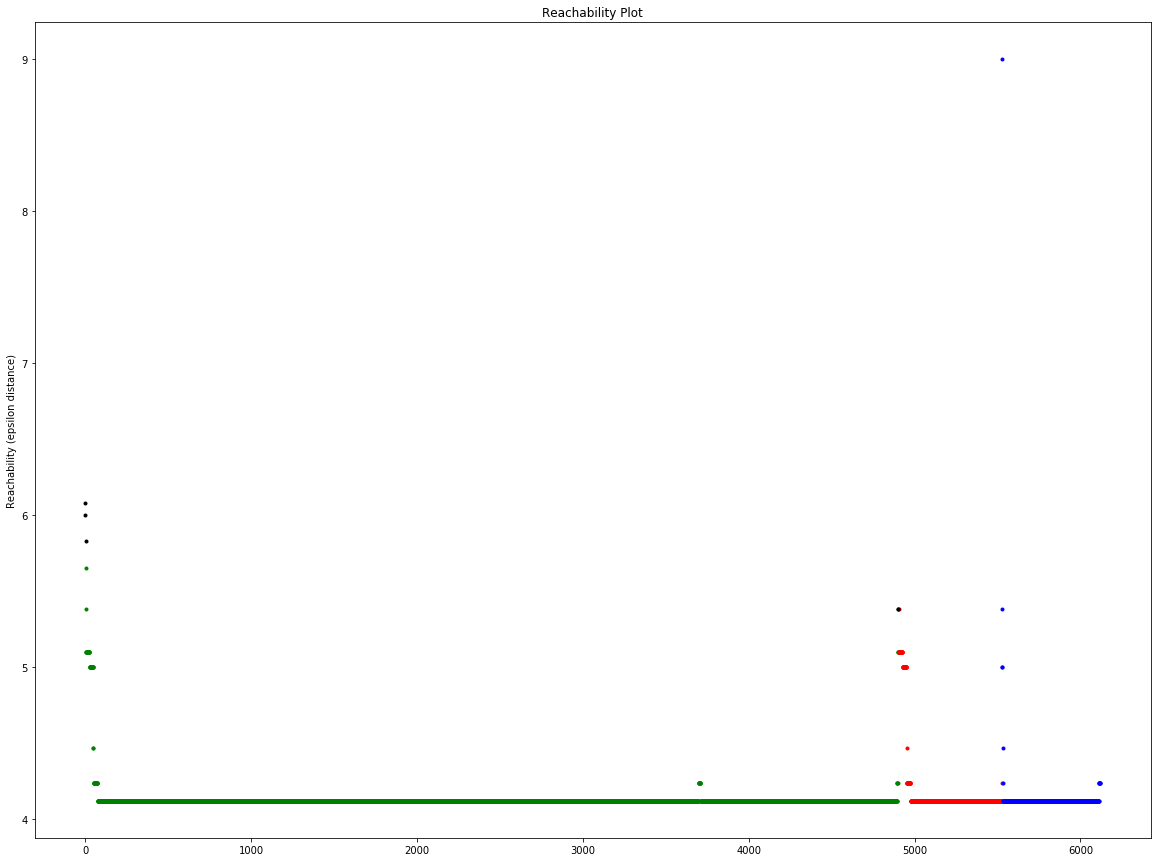

In [64]:
from sklearn.cluster import OPTICS, cluster_optics_dbscan, DBSCAN

colors = ['g.', 'r.', 'b.']

clust = OPTICS(min_samples=50)
clust.fit(data2)

reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

# Reachability plot
for klass in range(0, 3):
    Xk = np.where(labels == klass)
    #print(Xk)
    Rk = reachability[labels == klass]
    plt.plot(np.transpose(Xk), Rk, colors[klass])
#plt.xlim(0,550)
#plt.ylim(3.5, 9)
plt.rcParams["figure.figsize"] = [20,15]
plt.plot(np.transpose(np.where(labels == -1)), reachability[labels == -1], 'k.', color = "black")
plt.ylabel('Reachability (epsilon distance)')
plt.title('Reachability Plot')
plt.show()

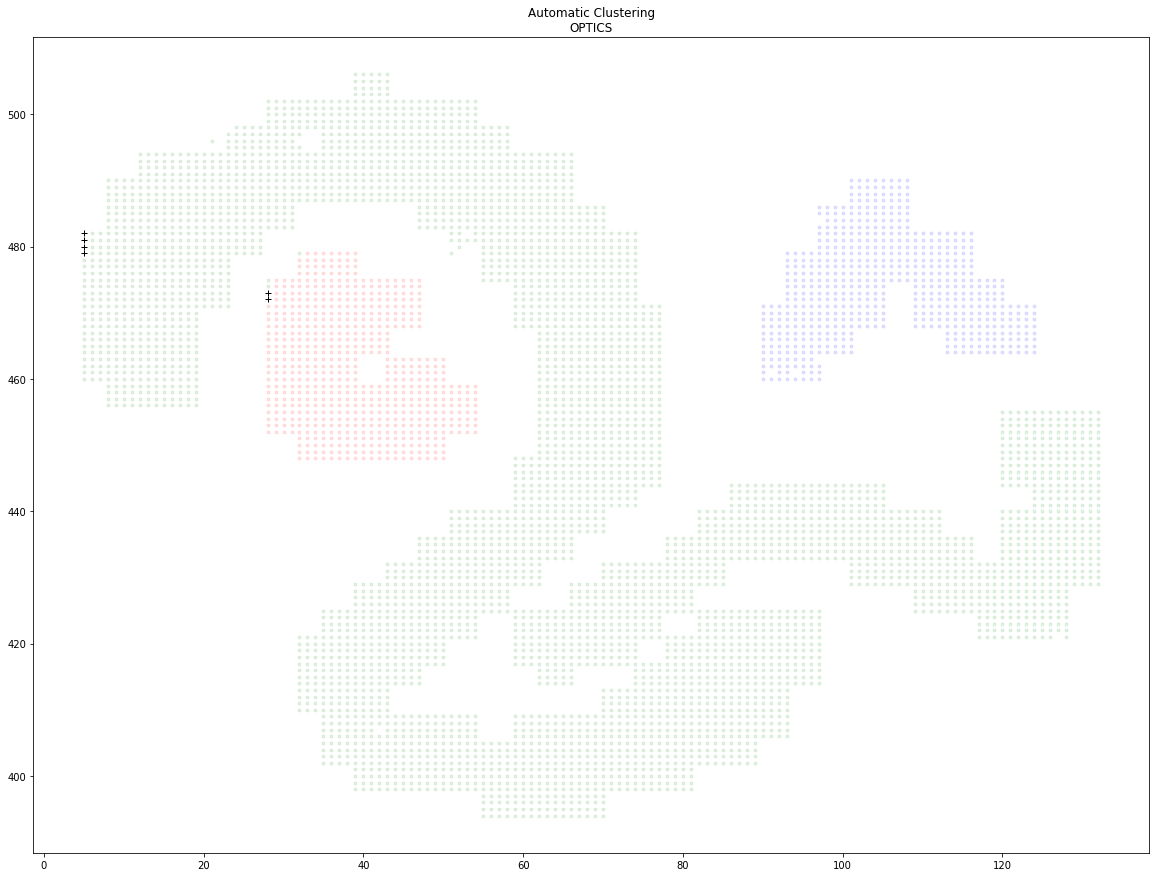

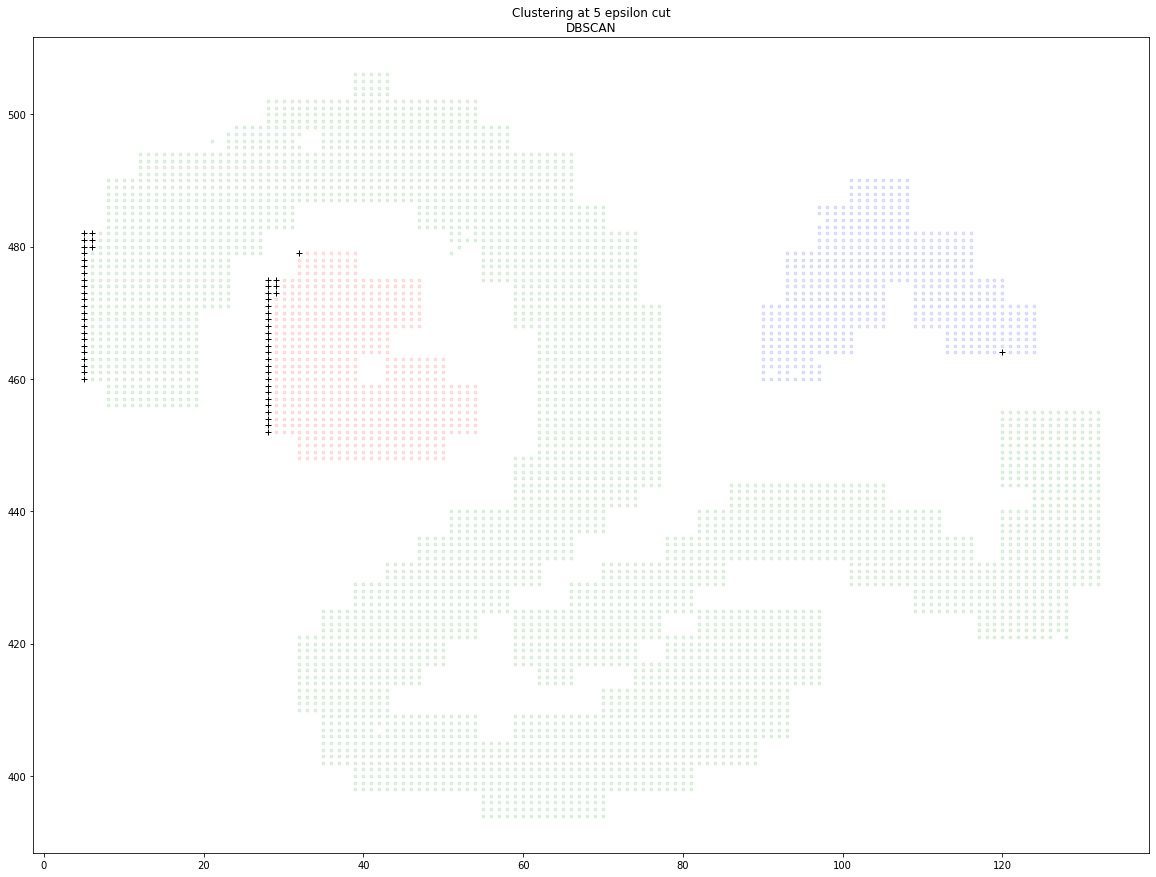

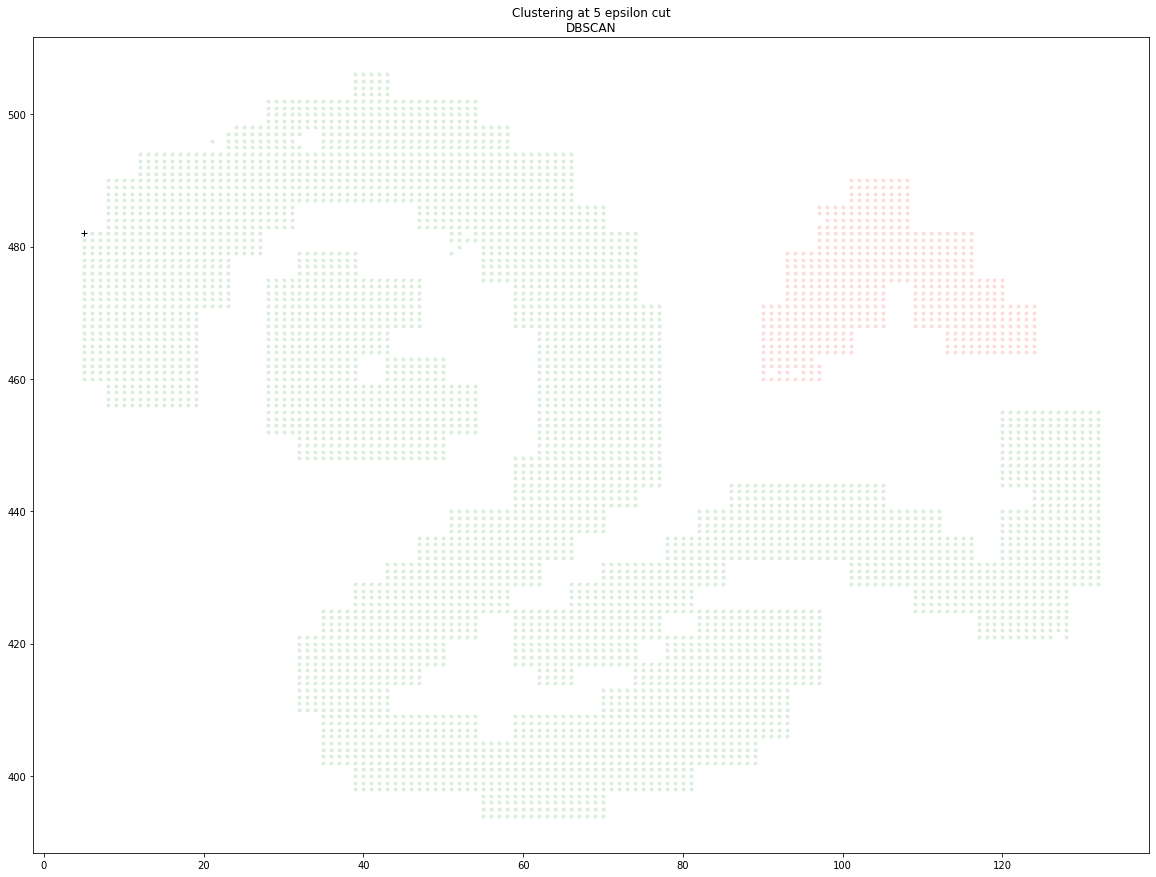

In [65]:
# OPTICS
colors = ['g.', 'r.', 'b.', 'y.', 'c.']
plt.figure(0)
for klass in range(0, 3):
    Xk = data2[clust.labels_ == klass]
    plt.plot(Xk[:, 0], Xk[:, 1], colors[klass], alpha=0.1)
plt.plot(data2[clust.labels_ == -1, 0], data2[clust.labels_ == -1, 1], 'k+', color = "black")
plt.title('Automatic Clustering\nOPTICS')
plt.show()

labels_5 = cluster_optics_dbscan(reachability=clust.reachability_,
                                   core_distances=clust.core_distances_,
                                   ordering=clust.ordering_, eps=5)
labels_6 = cluster_optics_dbscan(reachability=clust.reachability_,
                                   core_distances=clust.core_distances_,
                                   ordering=clust.ordering_, eps=6)

plt.figure(1)
for klass in range(0, 3):
    Xk = data2[labels_5 == klass]
    plt.plot(Xk[:, 0], Xk[:, 1], colors[klass], alpha=0.1, marker='.')
plt.plot(data2[labels_5 == -1, 0], data2[labels_5 == -1, 1], 'k+', color = "black")
plt.title('Clustering at 5 epsilon cut\nDBSCAN')
plt.show()

plt.figure(2)
for klass in range(0, 3):
    Xk = data2[labels_6 == klass]
    plt.plot(Xk[:, 0], Xk[:, 1], colors[klass], alpha=0.1, marker='.')
plt.plot(data2[labels_6 == -1, 0], data2[labels_6 == -1, 1], 'k+', color = "black")
plt.title('Clustering at 5 epsilon cut\nDBSCAN')
plt.show()